## Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

## Data Collection and Data Processing

In [2]:
df = pd.read_csv("/content/diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



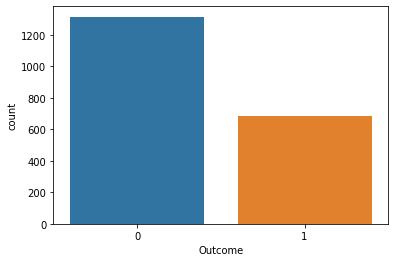

In [6]:
sns.countplot(df.Outcome)

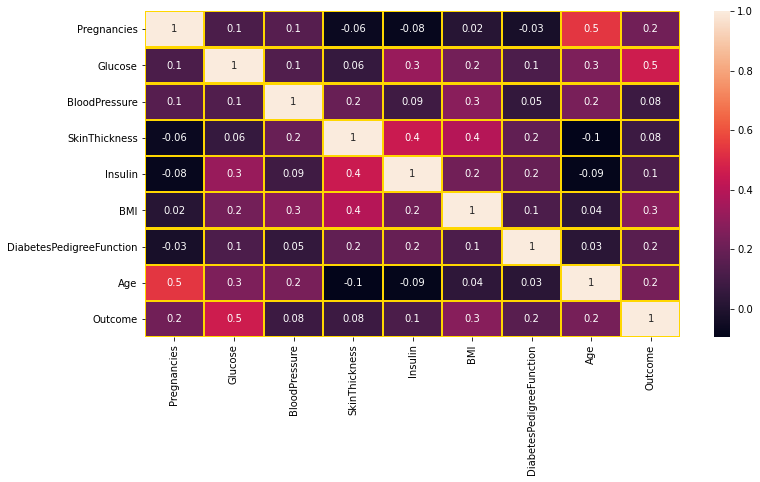

In [7]:
plt.figure(figsize = (12,6)) 
sns.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True)

In [8]:
X = df.drop(columns=["Outcome"], axis=1)
Y = df["Outcome"]

In [9]:
X.shape, Y.shape

((2000, 8), (2000,))

In [10]:
# Data Normalization

X = (X-np.min(X))/(np.max(X)-np.min(X)).values

## Train Test Split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
x_train.shape, x_test.shape

((1600, 8), (400, 8))

## Model Training


1.   Decision Tree Classifier
2.   KNN Classifier
3.   Random Forest Classifier



Desicion Tree Classifier

In [13]:
DS = DecisionTreeClassifier(criterion = "entropy", max_depth = 12)

In [14]:
DS.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

KNN Classifier

In [15]:
KN = KNeighborsClassifier(n_neighbors=1)

In [16]:
KN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

Random Forest Classifier

In [17]:
RF = RandomForestClassifier()

In [18]:
RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Model Evaluation

Decision Tree Score & Confusion Matrix

In [19]:
DS_result = DS.score(x_test, y_test)
print("Accuracy: %.3f%%" % (DS_result*100.0))

Accuracy: 96.750%


In [20]:
DS_pred = DS.predict(x_test) 

confusion_matrix(y_test,DS_pred)

array([[244,   9],
       [  4, 143]])

KNN Score & Confusion Matrix

In [21]:
KN_result = KN.score(x_test, y_test)
print("Accuracy: %.3f%%" % (KN_result*100.0))

Accuracy: 97.750%


In [22]:
KN_pred = KN.predict(x_test) 

confusion_matrix(y_test,KN_pred)

array([[246,   7],
       [  2, 145]])

Random Forest Score & Confusion Matrix

In [23]:
RF_result = RF.score(x_test, y_test)
print("Accuracy: %.3f%%" % (RF_result*100.0))

Accuracy: 99.000%


In [24]:
RF_pred = RF.predict(x_test) 

confusion_matrix(y_test,RF_pred)

array([[251,   2],
       [  2, 145]])

## Models Comparison

In [25]:
index = ["RF", "KNN", "DS"]
scores = [RF_result, KN_result, DS_result]

fig = px.pie(df, values=scores, names=index, title='Models Comparison')
fig.show()